# **Problem Statement**
## **Predicting Coupon Redemption**
XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?

 
Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

 
ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

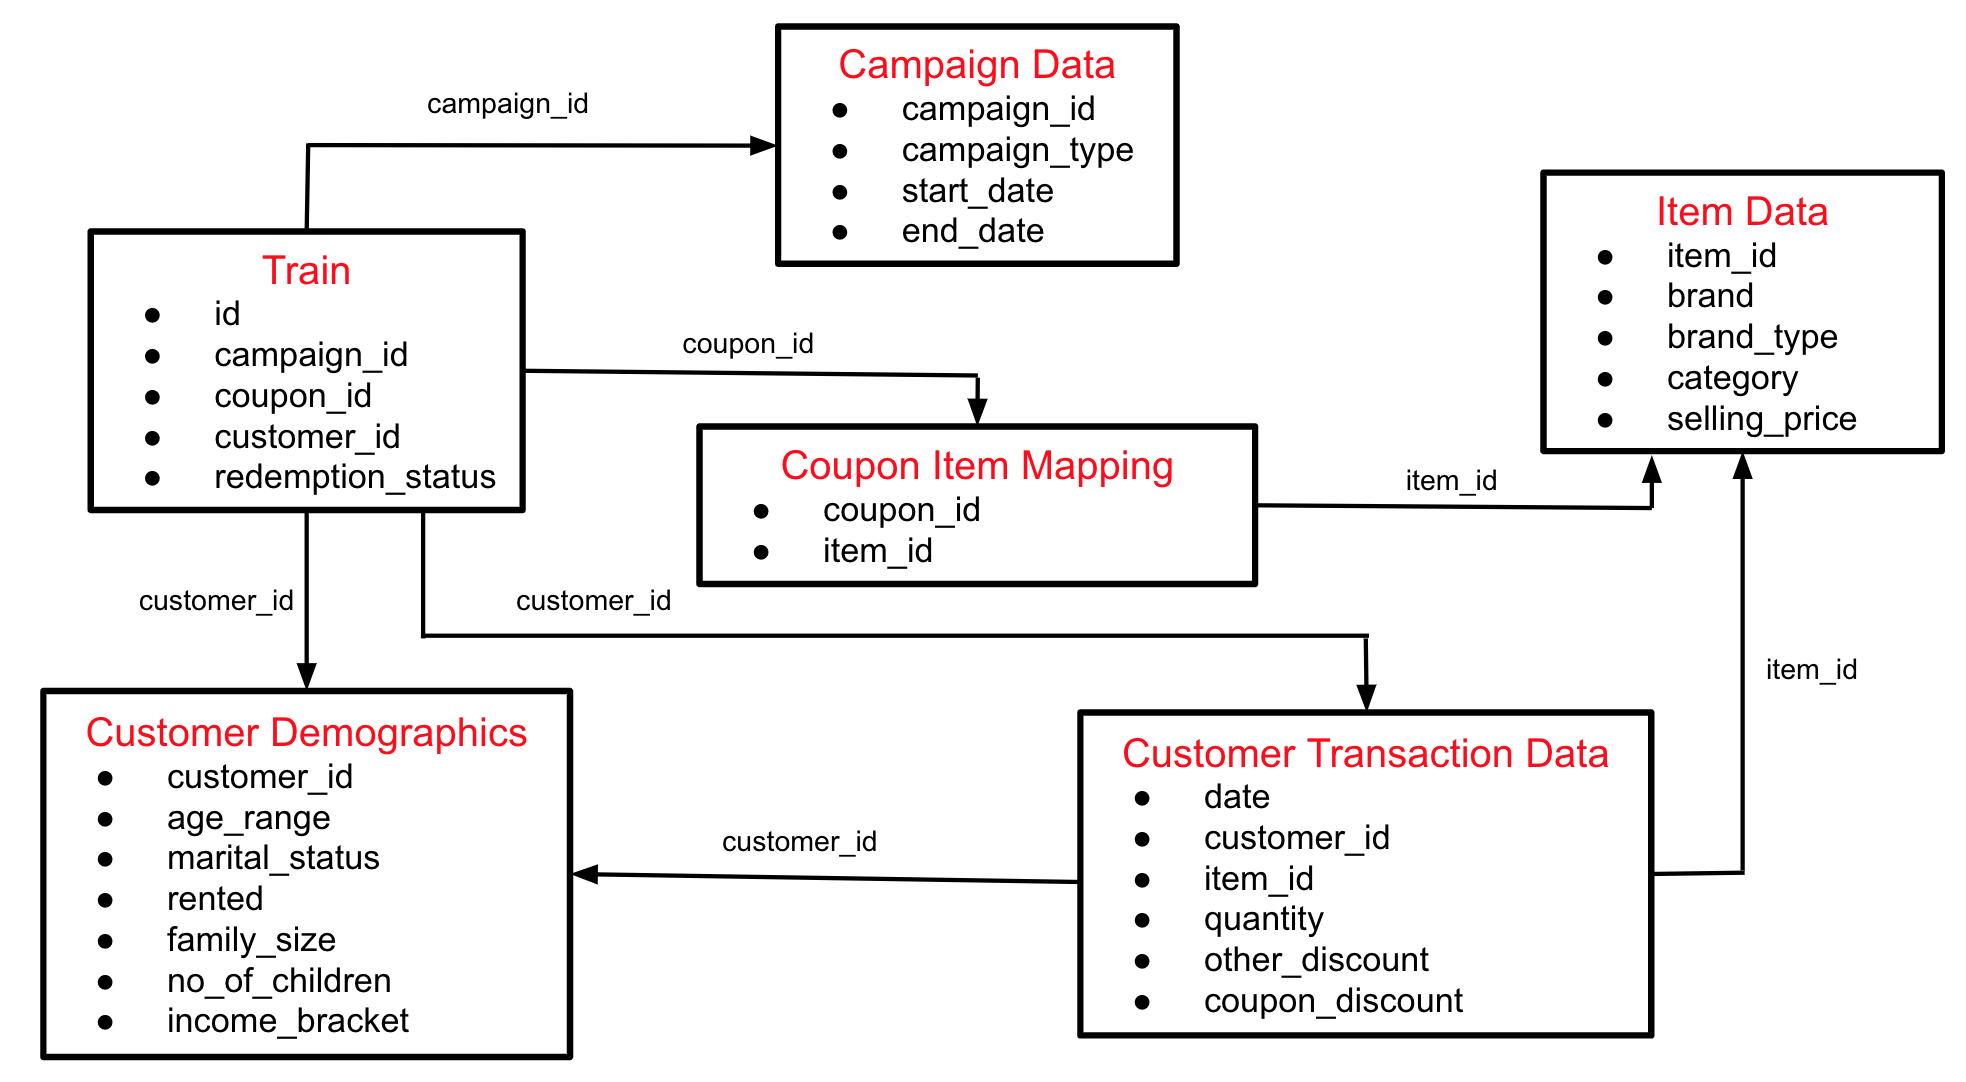

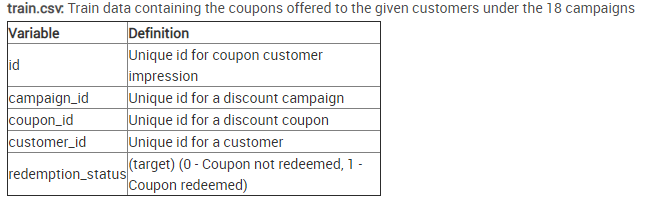

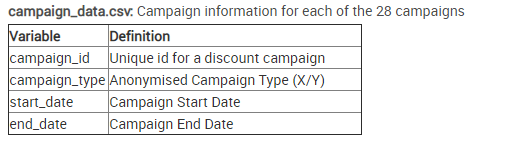

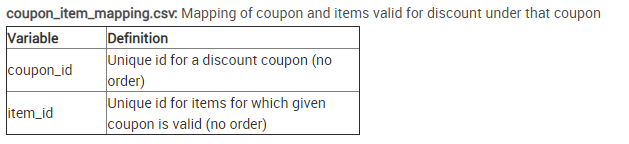

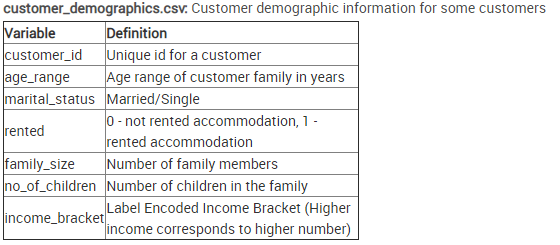

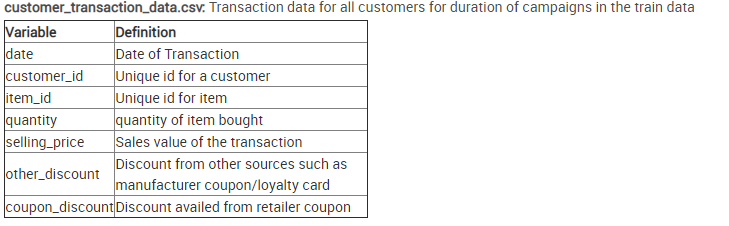

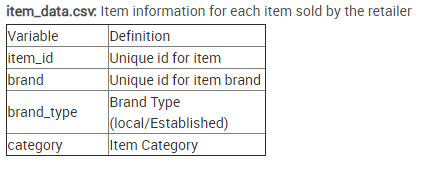

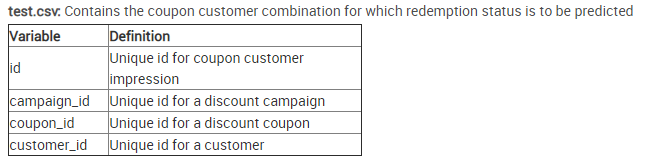

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
os.chdir("../input")

# **Exploring Data**

## **Campaign Data**

In [2]:
campaign_data = pd.read_csv("campaign_data.csv")
campaign_data.describe(include = 'all')

,campaign_id,campaign_type,start_date,end_date
count,28.000000,28,28,28
unique,NaN,2,25,26
top,NaN,Y,16/09/13,18/01/13
freq,NaN,22,2,2
mean,15.571429,NaN,NaN,NaN
std,9.118271,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,7.750000,NaN,NaN,NaN
50%,16.500000,NaN,NaN,NaN
75%,23.250000,NaN,NaN,NaN


In [3]:
campaign_data.dtypes

campaign_id       int64
campaign_type    object
start_date       object
end_date         object
dtype: object

## **Item Data**

In [4]:
item_data = pd.read_csv("item_data.csv")
item_data.describe(include = 'all')

,item_id,brand,brand_type,category
count,74066.000000,74066.000000,74066,74066
unique,NaN,NaN,2,19
top,NaN,NaN,Established,Grocery
freq,NaN,NaN,62842,32448
mean,37033.500000,1485.560055,NaN,NaN
std,21381.156856,1537.385673,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,18517.250000,278.000000,NaN,NaN
50%,37033.500000,978.000000,NaN,NaN
75%,55549.750000,2013.000000,NaN,NaN


In [5]:
item_data.dtypes

item_id        int64
brand          int64
brand_type    object
category      object
dtype: object

In [6]:
item_data.nunique()

item_id       74066
brand          5528
brand_type        2
category         19
dtype: int64

In [7]:
item_data.groupby(['brand_type']).count()

,item_id,brand,category
brand_type,,,
Established,62842,62842,62842
Local,11224,11224,11224


In [8]:
item_data.groupby(['category']).count()

,item_id,brand,brand_type
category,,,
Alcohol,303,303,303
Bakery,1679,1679,1679
"Dairy, Juices & Snacks",2425,2425,2425
Flowers & Plants,664,664,664
Fuel,14,14,14
Garden,102,102,102
Grocery,32448,32448,32448
Meat,2080,2080,2080
Miscellaneous,385,385,385


In [9]:
item_data.groupby(['brand_type','category']).count()

item_id  brand
brand_type  category                              
Established Alcohol                     303    303
            Bakery                     1066   1066
            Dairy, Juices & Snacks     2283   2283
            Flowers & Plants            652    652
            Garden                      101    101
            Grocery                   25226  25226
            Meat                       2035   2035
            Miscellaneous               353    353
            Natural Products           2345   2345
            Packaged Meat              1631   1631
            Pharmaceutical            22482  22482
            Prepared Food              1531   1531
            Restauarant                  78     78
            Salads                       39     39
            Seafood                     550    550
            Skin & Hair Care           2141   2141
            Travel                       19     19
            Vegetables (cut)              7      7
Local       Bakery                      613    613
            Dairy, Juices & Snacks      142    142
            Flowers & Plants             12     12
            Fuel                         14     14
            Garden                        1      1
            Grocery                    7222   7222
            Meat                         45     45
            Miscellaneous                32     32
            Natural Products            188    188
            Packaged Meat               335    335
            Pharmaceutical             1989   1989
            Prepared Food               349    349
            Salads                        1      1
            Seafood                     178    178
            Skin & Hair Care            103    103

## **Coupon Item Mapping**

In [10]:
coupon_item_data = pd.read_csv('coupon_item_mapping.csv')
coupon_item_data.describe(include = 'all')

,coupon_id,item_id
count,92663.000000,92663.000000
mean,155.967387,36508.613071
std,282.991720,21131.312716
min,1.000000,1.000000
25%,22.000000,18255.500000
50%,30.000000,37955.000000
75%,42.000000,54191.500000
max,1116.000000,74061.000000


In [11]:
coupon_item_data.dtypes

coupon_id    int64
item_id      int64
dtype: object

In [12]:
coupon_item_data.nunique()

coupon_id     1116
item_id      36289
dtype: int64

In [13]:
coupon_item_data.groupby(['coupon_id']).count()

,item_id
coupon_id,
1,39
2,2
3,17
4,24
5,7
...,...
1112,6
1113,15
1114,3


## **Customer Demographics**

In [14]:
customer_demog = pd.read_csv('customer_demographics.csv')
customer_demog.describe(include = 'all')

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
count,760.000000,760,431,760.000000,760,222,760.000000
unique,NaN,6,2,NaN,5,3,NaN
top,NaN,46-55,Married,NaN,2,1,NaN
freq,NaN,271,317,NaN,303,107,NaN
mean,779.201316,NaN,NaN,0.053947,NaN,NaN,4.715789
std,459.754429,NaN,NaN,0.226063,NaN,NaN,2.258817
min,1.000000,NaN,NaN,0.000000,NaN,NaN,1.000000
25%,382.750000,NaN,NaN,0.000000,NaN,NaN,3.000000
50%,774.500000,NaN,NaN,0.000000,NaN,NaN,5.000000
75%,1187.250000,NaN,NaN,0.000000,NaN,NaN,6.000000


In [15]:
customer_demog.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [16]:
customer_demog.nunique()


customer_id       760
age_range           6
marital_status      2
rented              2
family_size         5
no_of_children      3
income_bracket     12
dtype: int64

In [17]:
customer_demog.groupby(['age_range']).count()

,customer_id,marital_status,rented,family_size,no_of_children,income_bracket
age_range,,,,,,
18-25,45,19,45,45,12,45
26-35,130,71,130,130,56,130
36-45,187,123,187,187,74,187
46-55,271,128,271,271,66,271
56-70,59,44,59,59,9,59
70+,68,46,68,68,5,68


In [18]:
customer_demog.groupby(['age_range', 'marital_status']).count()

customer_id  rented  family_size  no_of_children  \
age_range marital_status                                                     
18-25     Married                   9       9            9               5   
          Single                   10      10           10               4   
26-35     Married                  45      45           45              30   
          Single                   26      26           26               6   
36-45     Married                  93      93           93              57   
          Single                   30      30           30               8   
46-55     Married                 102     102          102              41   
          Single                   26      26           26               5   
56-70     Married                  36      36           36               7   
          Single                    8       8            8               0   
70+       Married                  32      32           32               2   
          Single                   14      14           14               0   

                          income_bracket  
age_range marital_status                  
18-25     Married                      9  
          Single                      10  
26-35     Married                     45  
          Single                      26  
36-45     Married                     93  
          Single                      30  
46-55     Married                    102  
          Single                      26  
56-70     Married                     36  
          Single                       8  
70+       Married                     32  
          Single                      14

In [19]:
customer_demog.groupby(['income_bracket']).count()

,customer_id,age_range,marital_status,rented,family_size,no_of_children
income_bracket,,,,,,
1,59,59,29,59,59,18
2,68,68,27,68,68,18
3,70,70,39,70,70,16
4,165,165,96,165,165,51
5,187,187,95,187,187,44
6,88,88,55,88,88,26
7,32,32,26,32,32,12
8,37,37,27,37,37,21
9,29,29,18,29,29,8


In [20]:
customer_demog.groupby(['income_bracket', 'rented']).count()

customer_id  age_range  marital_status  family_size  \
income_bracket rented                                                        
1              0                52         52              23           52   
               1                 7          7               6            7   
2              0                64         64              25           64   
               1                 4          4               2            4   
3              0                62         62              32           62   
               1                 8          8               7            8   
4              0               153        153              85          153   
               1                12         12              11           12   
5              0               183        183              92          183   
               1                 4          4               3            4   
6              0                84         84              51           84   
               1                 4          4               4            4   
7              0                31         31              25           31   
               1                 1          1               1            1   
8              0                36         36              26           36   
               1                 1          1               1            1   
9              0                29         29              18           29   
10             0                10         10               6           10   
11             0                 5          5               5            5   
12             0                10         10               8           10   

                       no_of_children  
income_bracket rented                  
1              0                   13  
               1                    5  
2              0                   15  
               1                    3  
3              0                   11  
               1                    5  
4              0                   47  
               1                    4  
5              0                   43  
               1                    1  
6              0                   25  
               1                    1  
7              0                   11  
               1                    1  
8              0                   21  
               1                    0  
9              0                    8  
10             0                    2  
11             0                    2  
12             0                    4

In [21]:
customer_demog.groupby(['family_size']).count()

,customer_id,age_range,marital_status,rented,no_of_children,income_bracket
family_size,,,,,,
1,248,248,65,248,0,248
2,303,303,206,303,13,303
3,104,104,74,104,104,104
4,48,48,35,48,48,48
5+,57,57,51,57,57,57


In [22]:
customer_demog.groupby(['family_size','no_of_children']).count()

customer_id  age_range  marital_status  rented  \
family_size no_of_children                                                   
2           1                        13         13               5      13   
3           1                        94         94              68      94   
            2                        10         10               6      10   
4           2                        45         45              33      45   
            3+                        3          3               2       3   
5+          3+                       57         57              51      57   

                            income_bracket  
family_size no_of_children                  
2           1                           13  
3           1                           94  
            2                           10  
4           2                           45  
            3+                           3  
5+          3+                          57

In [23]:
demog_corr = customer_demog.corr()
demog_corr.style.background_gradient(cmap='RdBu_r')

,customer_id,rented,income_bracket
customer_id,1,0.0204315,0.0714766
rented,0.0204315,1,-0.122164
income_bracket,0.0714766,-0.122164,1


## **Customer Transaction Data**

In [24]:
transaction_data = pd.read_csv('customer_transaction_data.csv')
transaction_data.describe(include = 'all')

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
count,1324566,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
unique,549,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-09-03,NaN,NaN,NaN,NaN,NaN,NaN
freq,4753,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01
std,NaN,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00
min,NaN,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03
25%,NaN,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00
50%,NaN,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00
75%,NaN,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00


In [25]:
transaction_data.nunique()

date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
dtype: int64

In [26]:
transaction_data.dtypes

date                object
customer_id          int64
item_id              int64
quantity             int64
selling_price      float64
other_discount     float64
coupon_discount    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f81f07e10>,
      dtype=object)

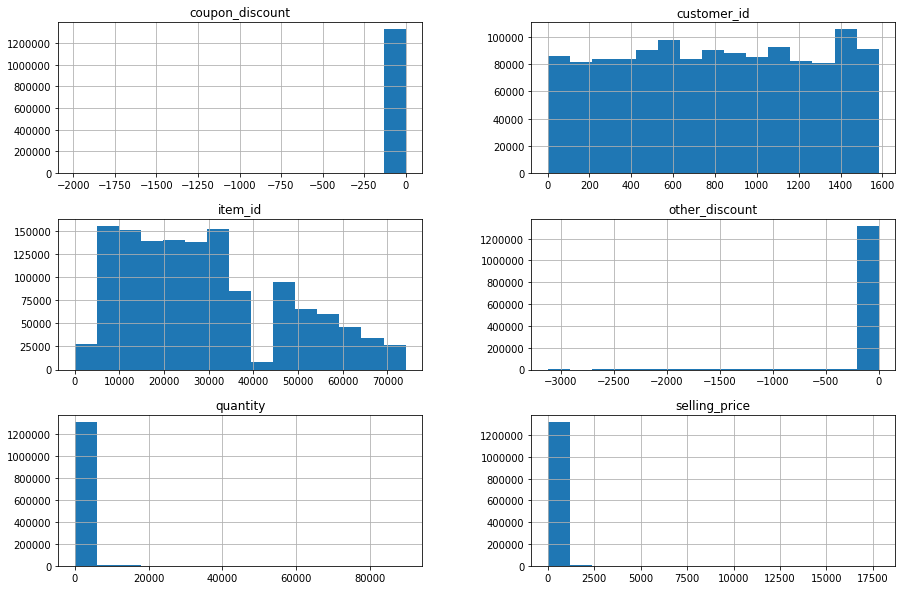

In [27]:
transaction_data.hist(figsize = (15,10),bins = 15)

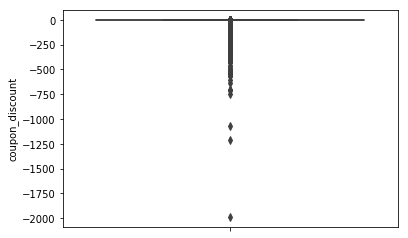

In [28]:
sns.boxplot(y = 'coupon_discount', data = transaction_data)

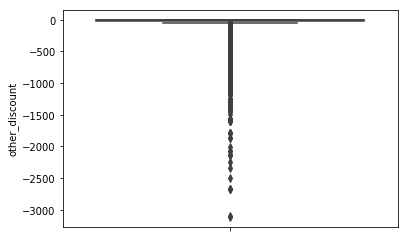

In [29]:
sns.boxplot(y = 'other_discount', data = transaction_data)

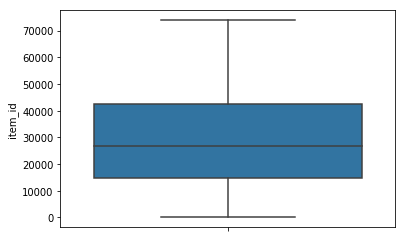

In [30]:
sns.boxplot(y = 'item_id', data = transaction_data)

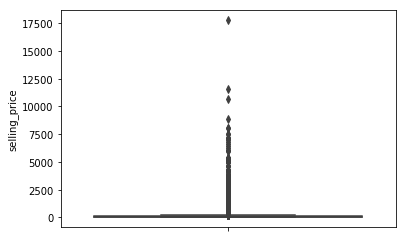

In [31]:
sns.boxplot(y = 'selling_price', data = transaction_data)

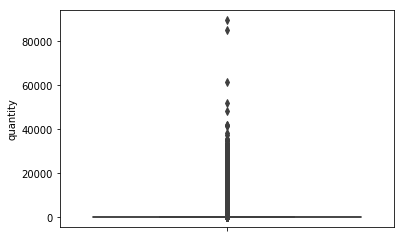

In [32]:
sns.boxplot(y = 'quantity', data = transaction_data)

In [33]:
transaction_data.quantile([0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0.00,1.0,1.00,1.0,0.36,-3120.31,-1992.23
0.01,15.0,4500.00,1.0,12.11,-148.89,-19.59
0.05,80.0,6226.00,1.0,23.87,-71.24,0.00
0.10,166.0,8443.00,1.0,35.26,-50.22,0.00
0.25,418.0,14684.00,1.0,49.16,-23.15,0.00
0.50,801.0,26597.00,1.0,78.01,-1.78,0.00
0.75,1198.0,42405.75,1.0,124.31,0.00,0.00
0.90,1444.0,57632.00,2.0,213.01,0.00,0.00
0.95,1506.0,63785.00,3.0,284.96,0.00,0.00
0.99,1566.0,71285.00,5350.7,800.74,0.00,0.00


## **Train Data**

In [34]:
train_data = pd.read_csv('train.csv')
train_data.describe(include = 'all')

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [35]:
train_data.dtypes

id                   int64
campaign_id          int64
coupon_id            int64
customer_id          int64
redemption_status    int64
dtype: object

In [36]:
train_data.nunique()

id                   78369
campaign_id             18
coupon_id              866
customer_id           1428
redemption_status        2
dtype: int64